# Introduction
------------
Predicting California Housing Prices is a project that aims to understand the factors that influence the prices of houses in California and to use this understanding to predict the prices of houses in the future. The project uses data from the 1990 California census and employs machine learning techniques to analyze the data and make predictions. The project is an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning and has an easily understandable list of variables. The project aims to provide insights into the housing market in California and to help people make informed decisions about buying and selling houses.

# Loading Necessassry Libraries and Data
----------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DataInput=pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [3]:
DataInput.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
DataInput.shape

(20640, 10)

so there are 20,640 rows and 10 columns are present in the dataset. here our target variable is median_house_value since we going to predict the pricing of home based on several factor like total square feet, total.no.of.bedrooms,income of the family. 

In [5]:
DataInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Dataset contain all columns of datatype 'Float' except one. so it easy to make our prediction without changing any values.

In [6]:
DataInput.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

So we see the missing value of in the dataset. we've found out that all the columns are filled except total_bedrooms is missing out the value of 207.So i decide to use dropna function to drop the missing values.The reason I'm going to use it to improve the accuracy of the model for  original data rather than calculating for the mean value.

In [7]:
DataInput.dropna(inplace=True)

In [8]:
# check agin the dataset is there any missing value
DataInput.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Now our dataset is clear to perform our analysis

# Data Visualization
--------------------

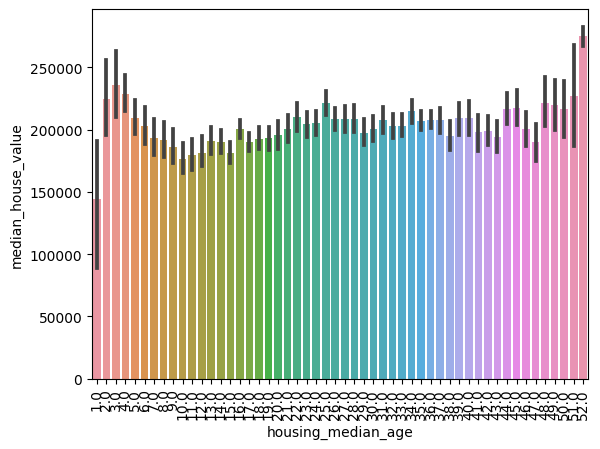

In [9]:
sns.barplot(x = "housing_median_age", y = "median_house_value", data = DataInput)
plt.xticks(rotation=90)
plt.savefig("house_age vs hous_price")
plt.show()

The above figure gives housing_pricing based houseAge. we interpret from the the graph the house with highest houseAge so for the greater prices and vice versa the house with 1 year houseAge price is slow comppare to other ages

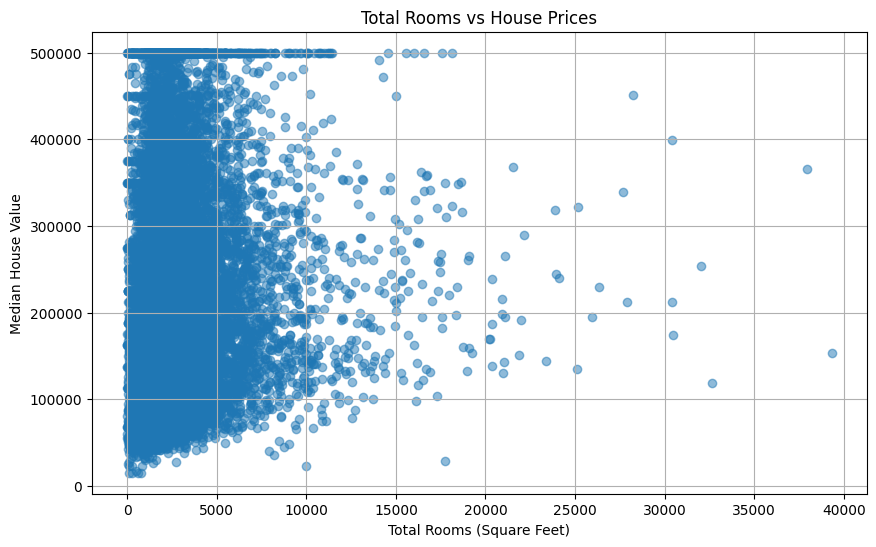

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(DataInput['total_rooms'], DataInput['median_house_value'], alpha=0.5)
plt.title('Total Rooms vs House Prices')
plt.xlabel('Total Rooms (Square Feet)')
plt.ylabel('Median House Value')
plt.grid(True)
plt.savefig("total_rooms vs house prices")
plt.show()

In this graph we see that pepole prefer the overall room size should be in the range of 100 to 10000 sq feet mostly.

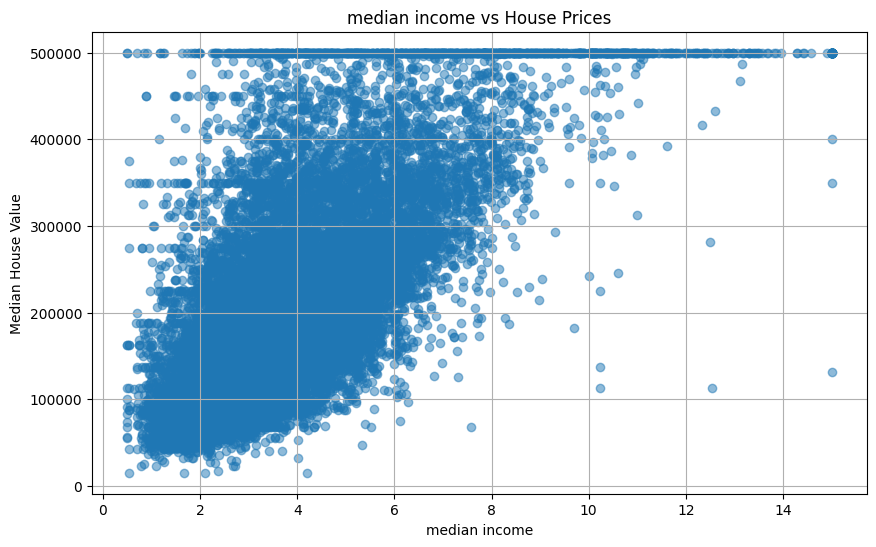

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(DataInput['median_income'], DataInput['median_house_value'], alpha=0.5)
plt.title('median income vs House Prices')
plt.xlabel('median income')
plt.ylabel('Median House Value')
plt.grid(True)
plt.savefig("median income vs house prices")
plt.show()

From the above graph we can interpret that people with median_income from 2 to 8.5 range prefer the house value in the range of 50,000 to 5,00,000. The contrast i see here the people with high median_income prefer some prefers the house prices for 1,00,000.

In [12]:
from sklearn.model_selection import train_test_split
x=DataInput.drop(['median_house_value'],axis=1)
y=DataInput['median_house_value']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [14]:
train_di=x_train.join(y_train)
train_di

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13316,-117.62,34.07,16.0,6009.0,1599.0,5110.0,1389.0,2.5677,INLAND,128900.0
15811,-122.43,37.76,52.0,2356.0,501.0,909.0,481.0,4.2569,NEAR BAY,455400.0
14818,-117.11,32.68,36.0,26.0,14.0,58.0,23.0,1.9107,NEAR OCEAN,125000.0
577,-122.06,37.73,5.0,3596.0,467.0,1738.0,512.0,7.0568,NEAR BAY,412500.0
2304,-119.76,36.83,20.0,3214.0,446.0,1360.0,463.0,5.2595,INLAND,110900.0
...,...,...,...,...,...,...,...,...,...,...
18104,-122.03,37.31,25.0,2131.0,410.0,1132.0,395.0,5.3508,<1H OCEAN,409100.0
13926,-114.65,34.89,17.0,2556.0,587.0,1005.0,401.0,1.6991,INLAND,69100.0
9789,-121.91,36.42,14.0,1078.0,261.0,382.0,171.0,3.7083,NEAR OCEAN,210000.0
12008,-117.55,33.93,25.0,5187.0,934.0,2725.0,860.0,4.1865,INLAND,154300.0


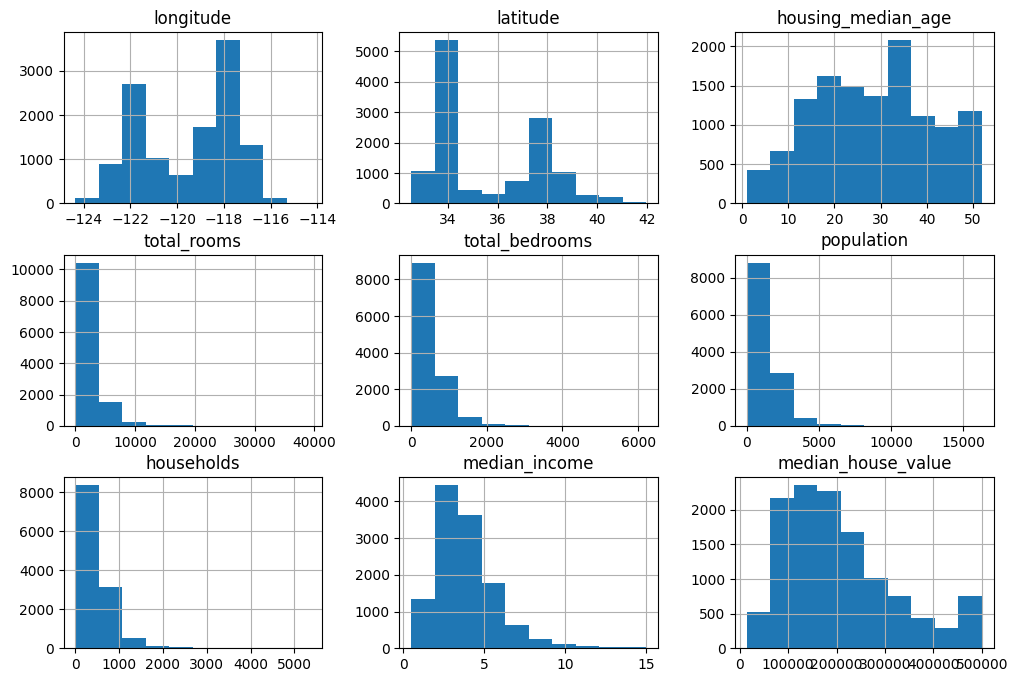

In [15]:
train_di.hist(figsize=(12,8))
plt.savefig("histogram_of_columns")

In [16]:
# Exclude non-numeric columns from the correlation calculation
numeric_columns = train_di.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_di[numeric_columns].corr()

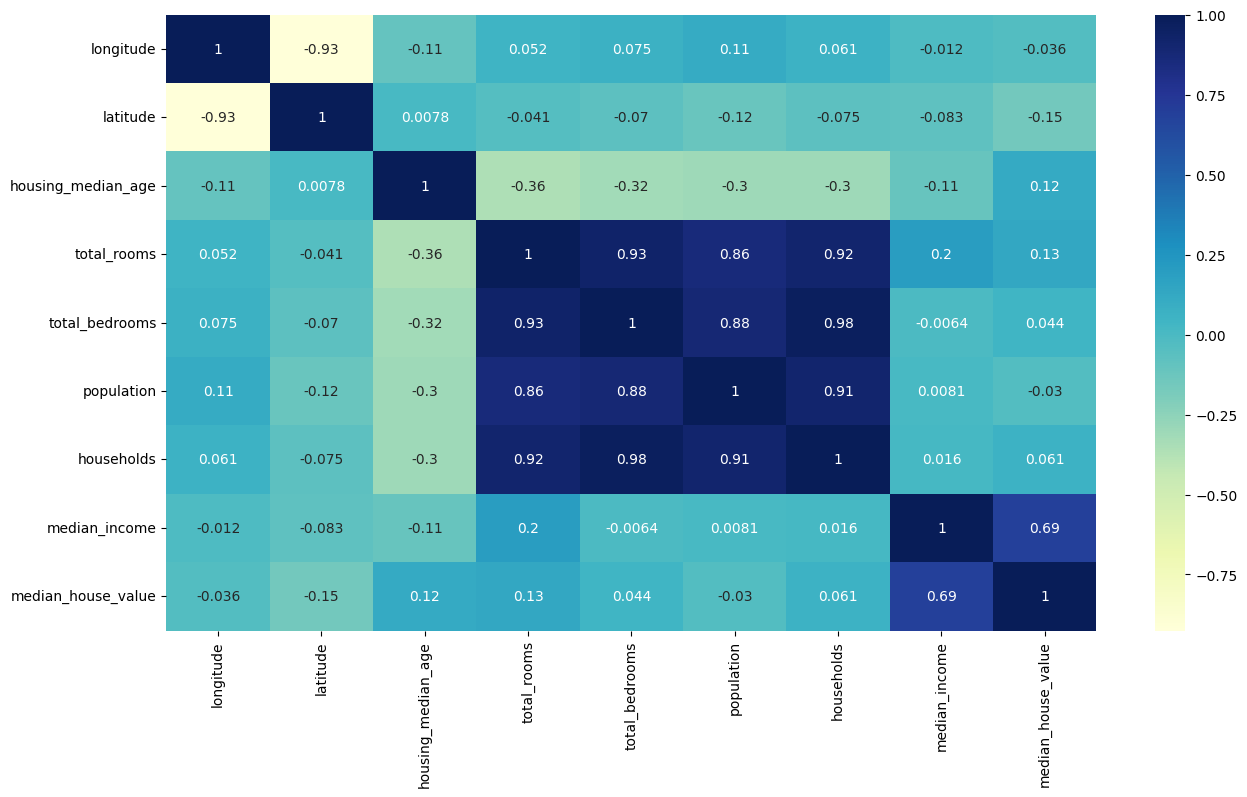

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,annot=True,cmap="YlGnBu")
plt.savefig("heatmap1")

From the heatmap the fields median_income,total_room,house_age are highly correalted with field median_house_value

-----------------------------------------------------------------------

# Data preprocessing
--------------------

In [18]:
train_di["total_rooms"] - np.log(train_di["total_rooms"]+1)
train_di["total_bedrooms"] - np.log(train_di["total_bedrooms"]+1)
train_di["population"] - np.log(train_di["population"]+1)
train_di["households"] - np.log(train_di["households"]+1)

13316    1381.762941
15811     474.822056
14818      19.821946
577       505.759724
2304      456.860115
            ...     
18104     389.018586
13926     395.003548
9789      165.852506
12008     853.241905
2693      179.774253
Name: households, Length: 12259, dtype: float64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

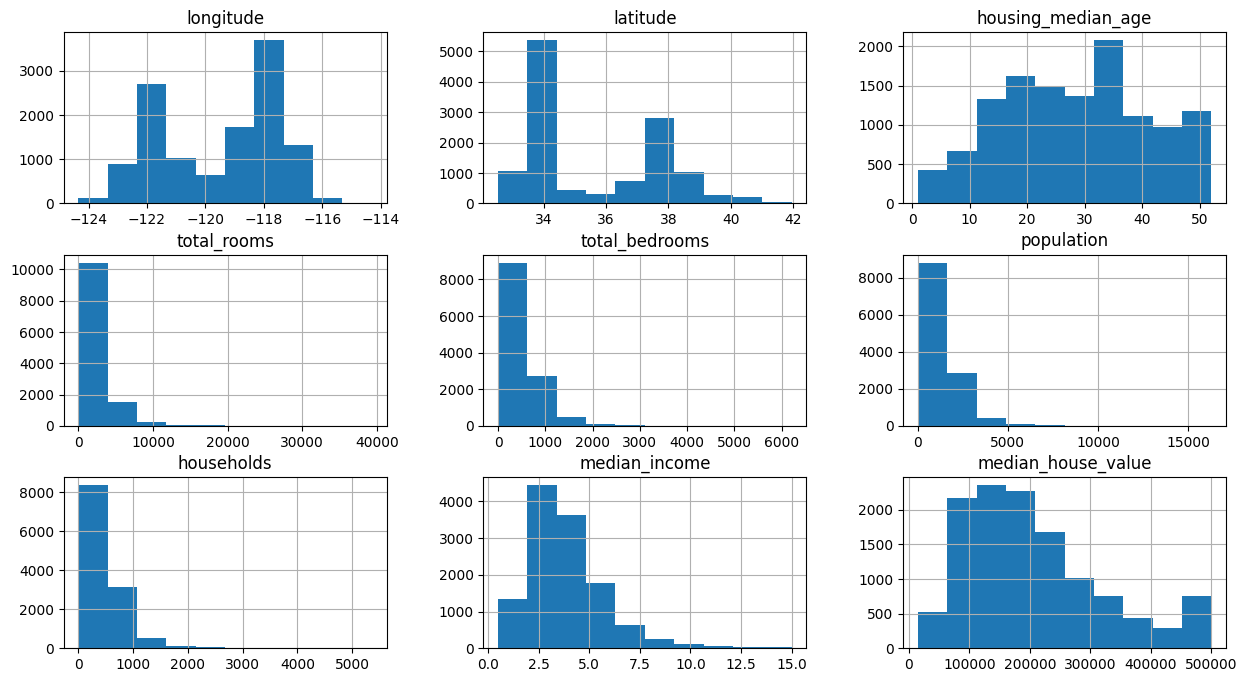

In [19]:
train_di.hist(figsize=(15,8))

In [20]:
train_di.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     5450
INLAND        3905
NEAR OCEAN    1549
NEAR BAY      1352
ISLAND           3
Name: count, dtype: int64

In [21]:
train_di=train_di.join(pd.get_dummies(train_di.ocean_proximity)).drop(["ocean_proximity"],axis=1)

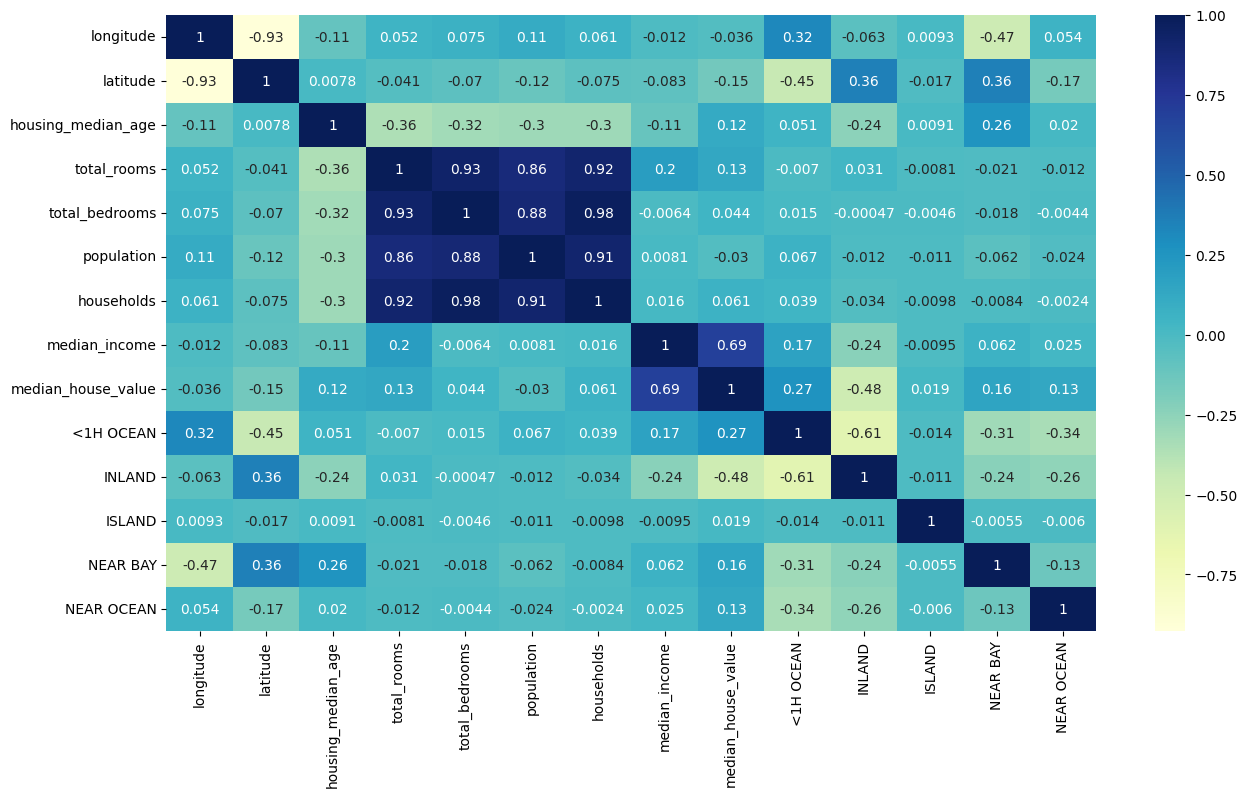

In [22]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_di.corr(), annot = True, cmap  = "YlGnBu")
plt.savefig("heatmap2")

From the heatmap the fields median_income,<iH OCEAN,NEAR BAY,NEAR OCEAN,total_room,house_age are highly correalted with field median_house_value

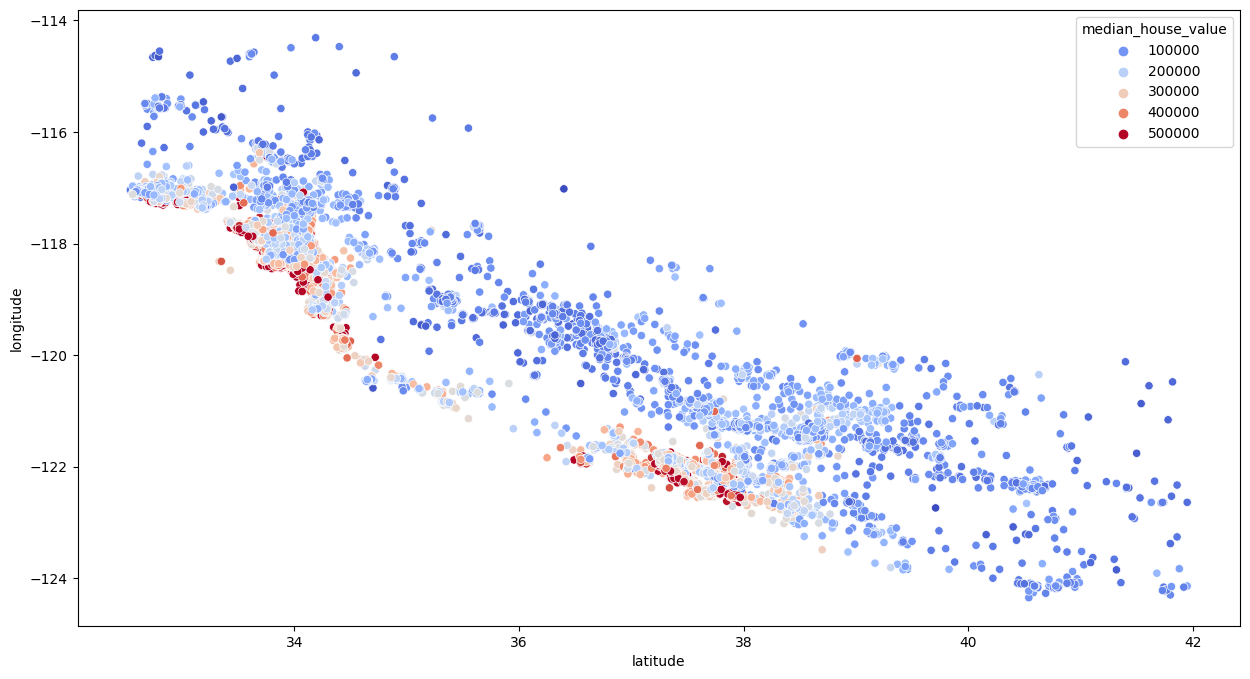

In [23]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x="latitude", y="longitude", data = train_di, hue = "median_house_value", palette = "coolwarm")
plt.savefig("latitude,longitude vs median_house")

From the above graph we can interpret with latitude and longitude how the median_house values are as we can see the median_house_value=500000 are in range of 34,38 latitude and -124 to -122 longitude and from 20 to 34 latitude and -120 to -117 longitude we see the red dots

# Feature Engineering 
---------------------

In [24]:
train_di["bedroom_ratio"] = train_di["total_bedrooms"]/train_di["total_rooms"]
train_di["household_rooms"] = train_di["total_rooms"]/train_di["households"]

In [25]:
train_di

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13316,-117.62,34.07,16.0,6009.0,1599.0,5110.0,1389.0,2.5677,128900.0,False,True,False,False,False,0.266101,4.326134
15811,-122.43,37.76,52.0,2356.0,501.0,909.0,481.0,4.2569,455400.0,False,False,False,True,False,0.212649,4.898129
14818,-117.11,32.68,36.0,26.0,14.0,58.0,23.0,1.9107,125000.0,False,False,False,False,True,0.538462,1.130435
577,-122.06,37.73,5.0,3596.0,467.0,1738.0,512.0,7.0568,412500.0,False,False,False,True,False,0.129867,7.023438
2304,-119.76,36.83,20.0,3214.0,446.0,1360.0,463.0,5.2595,110900.0,False,True,False,False,False,0.138768,6.941685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18104,-122.03,37.31,25.0,2131.0,410.0,1132.0,395.0,5.3508,409100.0,True,False,False,False,False,0.192398,5.394937
13926,-114.65,34.89,17.0,2556.0,587.0,1005.0,401.0,1.6991,69100.0,False,True,False,False,False,0.229656,6.374065
9789,-121.91,36.42,14.0,1078.0,261.0,382.0,171.0,3.7083,210000.0,False,False,False,False,True,0.242115,6.304094
12008,-117.55,33.93,25.0,5187.0,934.0,2725.0,860.0,4.1865,154300.0,False,True,False,False,False,0.180066,6.031395


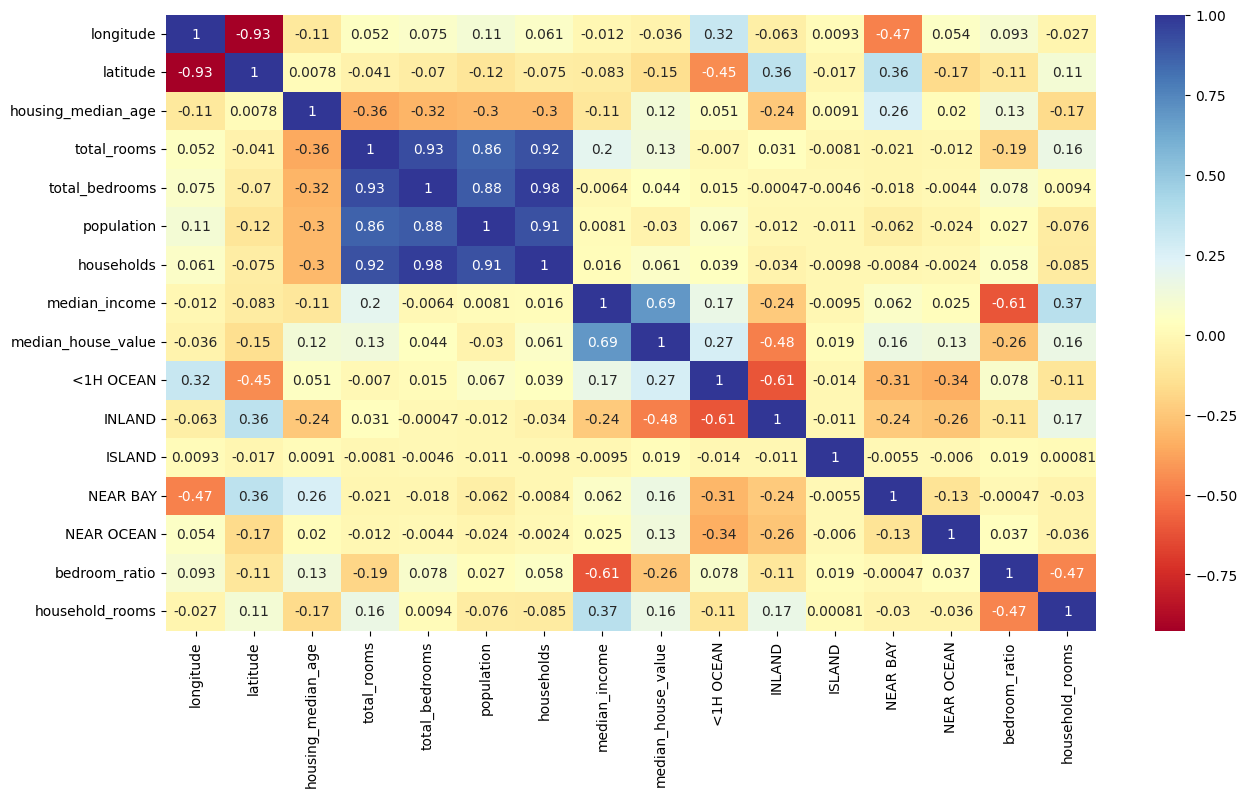

In [26]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_di.corr(), annot = True, cmap  = "RdYlBu")
plt.savefig("heatmap3")

We done the feature engineering in the train_di and add bedroom_ratio and houldhold_rooms and we can see that household_rooms have correlation with median_house_value. So it get us to conclusion that people choose the house with space to fill their house_holds

# Linear Regression Model
-------------------------

In [27]:
from sklearn.linear_model import LinearRegression 
x_train,y_train=train_di.drop(['median_house_value'],axis=1),train_di['median_house_value']

In [28]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
# we also need to make same changes in test data.
test_di = x_test.join(y_test)

In [30]:
test_di

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3436,-118.41,34.26,38.0,870.0,205.0,1065.0,222.0,2.5313,<1H OCEAN,136100.0
13005,-121.28,38.68,16.0,3467.0,615.0,1478.0,601.0,3.7500,INLAND,147300.0
11401,-117.93,33.72,17.0,4461.0,585.0,2095.0,580.0,7.6709,<1H OCEAN,319500.0
10231,-117.93,33.86,35.0,931.0,181.0,516.0,174.0,5.5867,<1H OCEAN,182500.0
14687,-117.04,32.90,6.0,6525.0,826.0,3146.0,806.0,9.2858,<1H OCEAN,436100.0
...,...,...,...,...,...,...,...,...,...,...
5080,-118.30,33.98,48.0,2010.0,445.0,1208.0,404.0,1.6611,<1H OCEAN,95800.0
5416,-118.44,34.02,32.0,2242.0,490.0,921.0,461.0,4.0429,<1H OCEAN,500001.0
3515,-118.47,34.25,34.0,1732.0,399.0,1120.0,401.0,4.1492,<1H OCEAN,195700.0
3223,-119.68,36.32,28.0,1325.0,276.0,873.0,240.0,2.5833,INLAND,54400.0


In [31]:
test_di.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     3584
INLAND        2591
NEAR OCEAN    1079
NEAR BAY       918
ISLAND           2
Name: count, dtype: int64

In [32]:
test_di["total_rooms"] - np.log(test_di["total_rooms"]+1)
test_di["total_bedrooms"] - np.log(test_di["total_bedrooms"]+1)
test_di["population"] - np.log(test_di["population"]+1)
test_di["households"] - np.log(test_di["households"]+1)

test_di = test_di.join(pd.get_dummies(test_di.ocean_proximity)).drop(["ocean_proximity"],axis=1)

test_di["bedroom_ratio"] = test_di["total_bedrooms"]/test_di["total_rooms"]
test_di["household_rooms"] = test_di["total_rooms"]/test_di["households"]

In [33]:
x_test, y_test = test_di.drop(["median_house_value"], axis = 1), test_di["median_house_value"]

In [34]:
train_di.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12259 entries, 13316 to 2693
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12259 non-null  float64
 1   latitude            12259 non-null  float64
 2   housing_median_age  12259 non-null  float64
 3   total_rooms         12259 non-null  float64
 4   total_bedrooms      12259 non-null  float64
 5   population          12259 non-null  float64
 6   households          12259 non-null  float64
 7   median_income       12259 non-null  float64
 8   median_house_value  12259 non-null  float64
 9   <1H OCEAN           12259 non-null  bool   
 10  INLAND              12259 non-null  bool   
 11  ISLAND              12259 non-null  bool   
 12  NEAR BAY            12259 non-null  bool   
 13  NEAR OCEAN          12259 non-null  bool   
 14  bedroom_ratio       12259 non-null  float64
 15  household_rooms     12259 non-null  float64
dtypes: boo

In [35]:
test_di.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8174 entries, 3436 to 10536
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           8174 non-null   float64
 1   latitude            8174 non-null   float64
 2   housing_median_age  8174 non-null   float64
 3   total_rooms         8174 non-null   float64
 4   total_bedrooms      8174 non-null   float64
 5   population          8174 non-null   float64
 6   households          8174 non-null   float64
 7   median_income       8174 non-null   float64
 8   median_house_value  8174 non-null   float64
 9   <1H OCEAN           8174 non-null   bool   
 10  INLAND              8174 non-null   bool   
 11  ISLAND              8174 non-null   bool   
 12  NEAR BAY            8174 non-null   bool   
 13  NEAR OCEAN          8174 non-null   bool   
 14  bedroom_ratio       8174 non-null   float64
 15  household_rooms     8174 non-null   float64
dtypes: bool

In [36]:
reg.score(x_test,y_test)

0.6491908458970015

In [37]:
print(reg.intercept_)
print(reg.coef_)

-2530657.827107609
[-2.91741938e+04 -2.79328405e+04  1.08829177e+03  2.44896864e+00
  8.41192466e+00 -4.66150030e+01  1.22691632e+02  4.12752873e+04
 -1.51015900e+04 -4.85256010e+04  9.99794244e+04 -2.29599527e+04
 -1.33922807e+04  2.71605439e+05  3.03104786e+03]


In [38]:
predictions=reg.predict(x_test)

In [39]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

In [40]:
p=mse(y_test,predictions)
print(p)

4597883890.369957


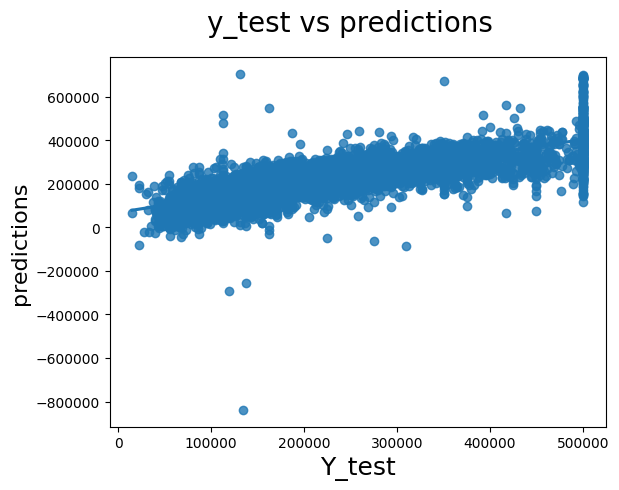

<Figure size 640x480 with 0 Axes>

In [41]:
fig = plt.figure()
sns.regplot(x=y_test, y=predictions)
fig.suptitle('y_test vs predictions', fontsize = 20)              # Plot heading 
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('predictions', fontsize = 16) 
plt.show()
plt.savefig('y_test vs predictions')